In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#!pip install pywaffle --quiet
from wordcloud import WordCloud

from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Proyecto Final IA/summer-products-with-rating-and-performance_2020-08.csv")
#/summer-products-with-rating-and-performance_2020-08.csv
print(df.columns)
print("\n")
print(df.shape)
#https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')


(1573, 43)


# Identificar una lista de atributos a utilizar:

Despues de realizar el EDA y de reflexionar acerca de que atributos podemos controlar realmente seleccionamos una lista de atributos con potencial de ser utilizados:

title,title_orig,price,retail_price,currency_buyer,uses_ad_boosts,tags,product_color,product_variation_size_id,product_variation_inventory,
shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,
merchant_info_subtitle,merchant_has_profile_picture,merchant_profile_picture,product_picture

In [4]:
interesting_features = ["units_sold","product_color","product_variation_inventory","shipping_is_express","origin_country","price","uses_ad_boosts","rating","merchant_rating","merchant_rating_count","merchant_has_profile_picture","badge_product_quality","has_urgency_banner"]
interesting_features_asuming = ["units_sold","product_color","product_variation_inventory","shipping_is_express","origin_country","price","uses_ad_boosts","rating","merchant_rating","merchant_rating_count","merchant_has_profile_picture","badge_product_quality","has_urgency_banner",'rating_count','rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count']

Acerca de las varables que no podemos controlar, hay varias con se correlacionan bastante con la cantidad vendida, cómo lo son el rating_count y  los rating_x_count, pero dado que están por fuera de nuestro control, buscamos una manera de realacionaar esas variables con los tags.

In [5]:
df_interesting = df.loc[:,interesting_features]
print(df_interesting.columns)
print("\n")
print(df_interesting.shape)
print(df_interesting.info())

Index(['units_sold', 'product_color', 'product_variation_inventory',
       'shipping_is_express', 'origin_country', 'price', 'uses_ad_boosts',
       'rating', 'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner'],
      dtype='object')


(1573, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   units_sold                    1573 non-null   int64  
 1   product_color                 1532 non-null   object 
 2   product_variation_inventory   1573 non-null   int64  
 3   shipping_is_express           1573 non-null   int64  
 4   origin_country                1556 non-null   object 
 5   price                         1573 non-null   float64
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                 

(1573, 13)


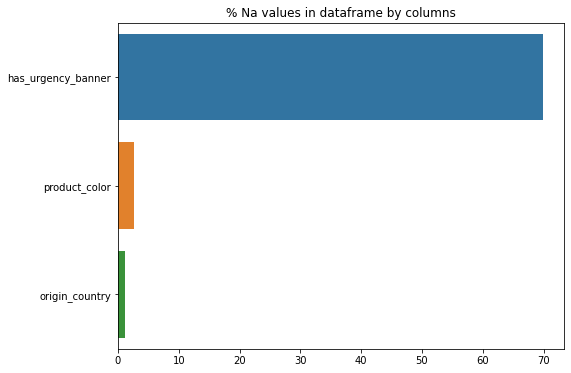

In [6]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False)*100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');
print(df_interesting.shape)
plot_missing_data(df_interesting)

In [7]:
nan_replace={'has_urgency_banner':0,'origin_country':'unknown','product_color':'multicolor'}
df_interesting.fillna(nan_replace,inplace=True)
df_interesting = df_interesting.dropna()
print(df_interesting.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 1572
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   units_sold                    1573 non-null   int64  
 1   product_color                 1573 non-null   object 
 2   product_variation_inventory   1573 non-null   int64  
 3   shipping_is_express           1573 non-null   int64  
 4   origin_country                1573 non-null   object 
 5   price                         1573 non-null   float64
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   merchant_rating               1573 non-null   float64
 9   merchant_rating_count         1573 non-null   int64  
 10  merchant_has_profile_picture  1573 non-null   int64  
 11  badge_product_quality         1573 non-null   int64  
 12  has_urgency_banner            1573 non-null   float64
dtypes: 

In [8]:
corr_map=df_interesting.corr()
print(corr_map["units_sold"].sort_values(ascending=False))
# plt.figure(figsize=(20,12))
# sns.heatmap(corr_map,annot=True,cmap='Blues')
# plt.xticks(rotation=45,fontsize=14)
# plt.yticks(rotation=45,fontsize=14)
# plt.show()

units_sold                      1.000000
merchant_rating_count           0.272897
merchant_has_profile_picture    0.143529
product_variation_inventory     0.133846
merchant_rating                 0.122504
badge_product_quality           0.063187
rating                          0.039478
shipping_is_express            -0.008308
uses_ad_boosts                 -0.016055
has_urgency_banner             -0.023891
price                          -0.024815
Name: units_sold, dtype: float64


# Ajuste de las variables:

A partir de las variables que tenemos, intentaremos hacer ajustes para ayudar al modelamiento.

Identifiquemos los colores que más venden y realizemos una clasificación en donde pongamos a los colores menos relevantes en una catégoria propia.

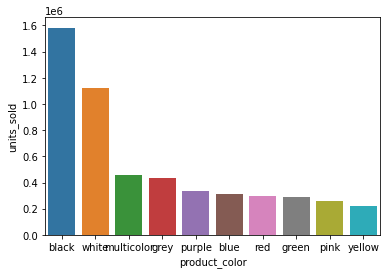

In [9]:
color_sale= df_interesting.groupby('product_color')['units_sold'].sum()
color_sale= color_sale.reset_index().sort_values(by='units_sold',ascending=False)
top_10 = color_sale.head(10)
sns.barplot(data=top_10,x='product_color',y='units_sold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



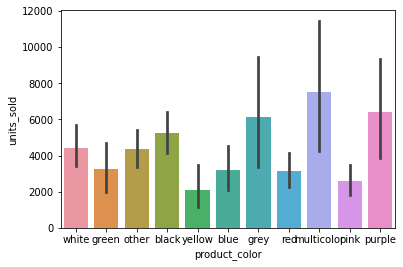

In [10]:
#Ponemos los otros colores en other, para eliminar ruido
top_10_vals = top_10.product_color.values
df_interesting['product_color'][-df_interesting['product_color'].isin(top_10_vals)]='other'
sns.barplot(data=df_interesting,x='product_color',y='units_sold')

Ahora realizaremos una codificación onehot, para convertir todas las variables categoricas en varias columnas de valores enteros binarios

In [11]:
from sklearn.preprocessing import OneHotEncoder

print(df_interesting.columns)
categories = df_interesting.loc[:,['product_color','origin_country']]
encoder = OneHotEncoder(sparse=False)
categories_1hot = pd.DataFrame(encoder.fit_transform(categories))
new_categories_nms = np.concatenate([encoder.categories_[0],encoder.categories_[1]])
categories_1hot.columns = new_categories_nms
print(categories_1hot.info())
df_interesting = pd.concat([df_interesting,categories_1hot],axis=1).drop(['product_color','origin_country'], axis= 1)
print(df_interesting.info())

Index(['units_sold', 'product_color', 'product_variation_inventory',
       'shipping_is_express', 'origin_country', 'price', 'uses_ad_boosts',
       'rating', 'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   black       1573 non-null   float64
 1   blue        1573 non-null   float64
 2   green       1573 non-null   float64
 3   grey        1573 non-null   float64
 4   multicolor  1573 non-null   float64
 5   other       1573 non-null   float64
 6   pink        1573 non-null   float64
 7   purple      1573 non-null   float64
 8   red         1573 non-null   float64
 9   white       1573 non-null   float64
 10  yellow      1573 non-null   float64
 11  AT          1573 non-null   float6

En esta parte agrgaremos 2 columnas que se relacionan con los tags:


*   best_tag_units_sold: Escogemos el valor del tag con las mejores ventas promedio
*   Elemento de lista: Calculamos el promedio del promedio de las ventas de todos los tag



In [12]:
dic_tags_uts = {}

df_search = df.loc[:,["tags","units_sold"]]
#print(df_search)
df_search = df_search.values
for row in df_search:
  #print(row)
  tags = row[0].split(",")
  units = row[1]
  for tag in tags:
    if(tag in dic_tags_uts):
      dic_tags_uts[tag].append(units)
    else:
      dic_tags_uts[tag] = [units]

print(dic_tags_uts)

{'Summer': [100, 20000, 100, 5000, 100, 10, 1000, 100, 5000, 1000, 100, 1000, 1000, 20000, 1000, 10000, 20000, 1000, 20000, 1000, 5000, 1000, 1000, 1000, 100, 1000, 100, 1000, 1000, 10000, 1000, 5000, 100, 1000, 10, 100, 100, 100, 10, 10000, 100, 100, 1000, 1000, 1000, 5000, 1000, 100, 5000, 100, 1000, 50, 50, 100, 1000, 5000, 100, 1000, 100, 10000, 1000, 100, 10000, 10000, 100, 50, 100, 10000, 100, 10000, 1000, 100, 10000, 100, 50000, 10000, 1000, 5000, 20000, 100, 100, 20000, 100, 100, 100, 1000, 1000, 100, 10000, 100, 5000, 100, 1000, 5000, 1000, 10000, 100, 10, 100, 1000, 10, 10, 100, 100, 50, 100, 50, 1000, 100, 5000, 1, 20000, 100, 50, 1000, 10000, 5000, 100, 5000, 5000, 1000, 100, 5000, 1000, 100, 20000, 100, 100, 1000, 5000, 1000, 5000, 100, 100, 1000, 100, 1000, 10000, 5000, 100, 5000, 10, 1000, 1000, 50, 1000, 100, 5000, 100, 100, 5000, 100, 100, 1000, 5000, 1000, 100, 100, 1000, 100, 100, 1000, 20000, 100, 50, 1000, 10000, 5000, 1000, 50, 1000, 10000, 1000, 1000, 5000, 10000

In [13]:
#Vamos a crear un nuevo diccionario donde solo se guarden los promedios

for elem in dic_tags_uts:
  arr_tmp = np.array(dic_tags_uts[elem])
  dic_tags_uts[elem] = arr_tmp.mean()

print(dic_tags_uts)

{'Summer': 3325.264950794852, 'Fashion': 4566.326247689464, 'womenunderwearsuit': 100.0, 'printedpajamasset': 100.0, 'womencasualshort': 50.5, "Women's Fashion": 4524.565019011407, 'flamingo': 100.0, 'loungewearset': 100.0, 'Casual': 3903.321546961326, 'Shirt': 4589.398576512455, 'casualsleepwear': 100.0, 'Shorts': 3258.7944444444443, 'flamingotshirt': 100.0, 'Elastic': 2985.1666666666665, 'Vintage': 3004.3137254901962, 'Tops': 5722.974358974359, 'tshirtandshortsset': 100.0, 'Women': 4879.431841831426, 'Sleepwear': 1600.0, 'Print': 3154.337837837838, 'womenpajamasset': 100.0, 'womennightwear': 100.0, 'Pajamas': 2050.0, 'womensleepwearset': 100.0, 'Mini': 5316.317073170731, 'womens dresses': 7226.190476190476, 'Patchwork': 2950.0, 'fashion dress': 4275.0, 'Dress': 4464.897996357013, 'Mini dress': 5799.670588235294, 'Women S Clothing': 2221.3793103448274, 'backless': 4322.692307692308, 'party': 7020.930232558139, 'summer dresses': 4805.0142857142855, 'sleeveless': 4680.7189655172415, 'se

In [14]:
#Crear las listas que vamos a agregar al dataset

best_tag_sold_list = []
avrg_tag_sold_list = []

df_search = df.loc[:,["tags","units_sold"]]
#print(df_search)
df_search = df_search.values
for row in df_search:
  #print(row)
  tags = row[0].split(",")
  best_tag = tags[0]
  best_tag_val = dic_tags_uts[best_tag]
  avrg_tag_val = 0

  for tag in tags:
    val = dic_tags_uts[tag]
    if(best_tag_val< val):
      best_tag = tag
      best_tag_val = val
    avrg_tag_val += val
  
  avrg_tag_val /= len(tags)
  best_tag_sold_list.append(best_tag_val)
  avrg_tag_sold_list.append(avrg_tag_val)

In [15]:
#Concatenar las nuevas columnas al data frame

df_interesting["best_tag_sales"] = best_tag_sold_list
df_interesting["avrg_tag_sales"] = avrg_tag_sold_list

print(df_interesting.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 1572
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   units_sold                    1573 non-null   int64  
 1   product_variation_inventory   1573 non-null   int64  
 2   shipping_is_express           1573 non-null   int64  
 3   price                         1573 non-null   float64
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   merchant_rating               1573 non-null   float64
 7   merchant_rating_count         1573 non-null   int64  
 8   merchant_has_profile_picture  1573 non-null   int64  
 9   badge_product_quality         1573 non-null   int64  
 10  has_urgency_banner            1573 non-null   float64
 11  black                         1573 non-null   float64
 12  blue                          1573 non-null   float64
 13  gre

In [16]:
print(df_interesting.corr()["units_sold"].sort_values(ascending=False))

units_sold                      1.000000
best_tag_sales                  0.682957
avrg_tag_sales                  0.644284
merchant_rating_count           0.272897
merchant_has_profile_picture    0.143529
product_variation_inventory     0.133846
merchant_rating                 0.122504
multicolor                      0.068327
badge_product_quality           0.063187
black                           0.046926
grey                            0.041945
purple                          0.040874
rating                          0.039478
CN                              0.026664
unknown                         0.023097
SG                              0.021785
white                           0.003716
other                           0.000522
shipping_is_express            -0.008308
GB                             -0.009004
AT                             -0.011430
uses_ad_boosts                 -0.016055
has_urgency_banner             -0.023891
price                          -0.024815
VE              

# Creación de modelos

Lo primero es seperar el dataset en tres:
*   Conjunto de entrenamiento
*   Conjunto de selección de hiper parametros
*   Conjunto de prueba






In [17]:
from sklearn.model_selection import train_test_split
X=df_interesting.drop(['units_sold'],axis=1)
Y=df_interesting['units_sold']
trainig_size = 0.6
testing_size = 1-trainig_size
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testing_size, random_state=random_seed,shuffle=True)
X_test, X_test_hp, y_test, y_test_hp = train_test_split(X, Y, test_size=0.5, random_state=random_seed,shuffle=True)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import Pipeline


base_models = [('DT_model',DecisionTreeClassifier(random_state=random_seed)),
            ('RF_model',RandomForestClassifier(random_state=random_seed,n_jobs=-1)),
            ('LR_model',LogisticRegression(random_state=random_seed,n_jobs=-1)),
            ("XGB_model", XGBClassifier(random_state=random_seed, n_jobs=-1)),
             ("ETR_model", ExtraTreesRegressor(n_estimators=20, random_state=random_seed))]
# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4
split = KFold(n_splits=kfolds,shuffle=True,random_state=random_seed)

# Preprocessing, fitting, making predictions and scoring for every model:
for name,model in base_models:
    temp_model = Pipeline(steps=[('model',model)])
    temp_model.fit(X_train, y_train)
    cv_results = cross_val_score(temp_model,X_train,y_train,cv=split,n_jobs=-1)
    # output:
    min_score = round(min(cv_results),4)
    max_score = round(max(cv_results),4)
    mean_score = round(np.mean(cv_results),4)
    std_dev = round(np.std(cv_results),4)
    print(f'{name} cross validation accuracy score:{mean_score} +- {std_dev} (std) min:{min_score},max:{max_score}')

DT_model cross validation accuracy score:0.4157 +- 0.0176 (std) min:0.3983,max:0.4407
RF_model cross validation accuracy score:0.4761 +- 0.0215 (std) min:0.4596,max:0.5127
LR_model cross validation accuracy score:0.2937 +- 0.0097 (std) min:0.2809,max:0.3051
XGB_model cross validation accuracy score:0.4687 +- 0.0353 (std) min:0.4449,max:0.5297
ETR_model cross validation accuracy score:0.4484 +- 0.0939 (std) min:0.3312,max:0.583


Index(['product_variation_inventory', 'shipping_is_express', 'price',
       'uses_ad_boosts', 'rating', 'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner', 'black', 'blue', 'green', 'grey', 'multicolor',
       'other', 'pink', 'purple', 'red', 'white', 'yellow', 'AT', 'CN', 'GB',
       'SG', 'US', 'VE', 'unknown', 'best_tag_sales', 'avrg_tag_sales'],
      dtype='object')
[2.88723927e-02 8.05753392e-05 3.08329147e-02 2.58640334e-02
 2.98387849e-02 5.01035390e-02 9.20764361e-02 1.01587304e-02
 8.08821902e-03 1.34482729e-02 1.42134106e-02 3.24383210e-03
 1.01404413e-02 5.93929071e-03 1.77748792e-03 1.30510302e-02
 3.41751846e-03 2.75191317e-03 8.28706332e-03 1.18194070e-02
 1.33090401e-02 0.00000000e+00 1.49657188e-03 1.24128884e-06
 0.00000000e+00 3.30587609e-04 1.37080100e-05 7.38849170e-03
 4.12195840e-01 2.01259226e-01]


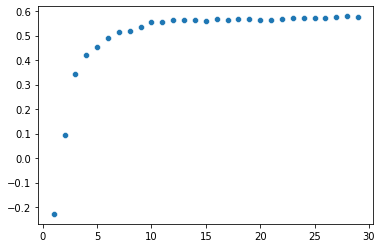

In [28]:
# temp_model = 
# temp_model.fit(X_test_hp, y_tes_hp)
# cv_results = cross_val_score(temp_model,X_train,y_train,cv=split,n_jobs=-1)
# # output:
# min_score = round(min(cv_results),4)
# max_score = round(max(cv_results),4)
# mean_score = round(np.mean(cv_results),4)
# std_dev = round(np.std(cv_results),4)
# print(f'{name} cross validation accuracy score:{mean_score} +- {std_dev} (std) min:{min_score},max:{max_score}')

x_vals = []
y_scores = []
#X_test.drop("prediction",axis=1)
for i in range(1,30):
  temp_model = ExtraTreesRegressor(n_estimators=i, random_state=random_seed)
  temp_model.fit(X_train, y_train)
  cv_results = cross_val_score(temp_model,X_test_hp, y_test_hp,cv=split,n_jobs=-1)
  y_predict = cv_results.mean()
  x_vals.append(i)
  y_scores.append(y_predict)

sns.scatterplot(x=x_vals,y=y_scores)
#print(y_scores)
print(X_test_hp.columns)
print(temp_model.feature_importances_)

Index(['product_variation_inventory', 'shipping_is_express', 'price',
       'uses_ad_boosts', 'rating', 'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner', 'black', 'blue', 'green', 'grey', 'multicolor',
       'other', 'pink', 'purple', 'red', 'white', 'yellow', 'AT', 'CN', 'GB',
       'SG', 'US', 'VE', 'unknown', 'best_tag_sales', 'avrg_tag_sales'],
      dtype='object')
[0.03023006 0.         0.08766912 0.02269016 0.13357067 0.10974517
 0.13645457 0.01679527 0.00707522 0.01148892 0.02845371 0.00688079
 0.0056399  0.00344634 0.00088718 0.0144166  0.01145536 0.009107
 0.00569809 0.01511155 0.00168374 0.         0.00272029 0.
 0.         0.         0.00249518 0.00212922 0.16526465 0.16889126]


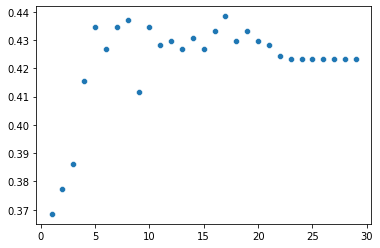

In [27]:
x_vals = []
y_scores = []
#X_test.drop("prediction",axis=1)
for i in range(1,30):
  temp_model = DecisionTreeClassifier(random_state=random_seed,max_depth=i)
  temp_model.fit(X_train, y_train)
  cv_results = cross_val_score(temp_model,X_test_hp, y_test_hp,cv=split,n_jobs=-1)
  y_predict = cv_results.mean()
  x_vals.append(i)
  y_scores.append(y_predict)

sns.scatterplot(x=x_vals,y=y_scores)
print(X_test_hp.columns)
print(temp_model.feature_importances_)

Index(['product_variation_inventory', 'shipping_is_express', 'price',
       'uses_ad_boosts', 'rating', 'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner', 'black', 'blue', 'green', 'grey', 'multicolor',
       'other', 'pink', 'purple', 'red', 'white', 'yellow', 'AT', 'CN', 'GB',
       'SG', 'US', 'VE', 'unknown', 'best_tag_sales', 'avrg_tag_sales'],
      dtype='object')
[0.04512329 0.         0.04230834 0.03593981 0.06136397 0.04077967
 0.07499992 0.04235165 0.03688147 0.         0.07999288 0.0400764
 0.02706826 0.         0.02352382 0.05404733 0.03835997 0.03388139
 0.02406958 0.01362749 0.03715597 0.         0.         0.
 0.         0.         0.         0.01563723 0.09994506 0.13286647]


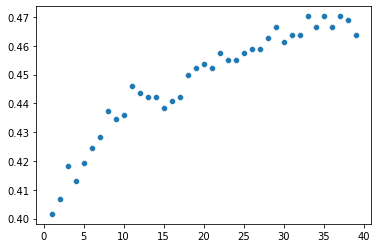

In [29]:
 x_vals = []
y_scores = []
#X_test.drop("prediction",axis=1)
for i in range(1,40):
  temp_model = XGBClassifier(random_state=random_seed, n_jobs=-1,n_estimators = i)
  temp_model.fit(X_train, y_train)
  cv_results = cross_val_score(temp_model,X_test_hp, y_test_hp,cv=split,n_jobs=-1)
  y_predict = cv_results.mean()
  x_vals.append(i)
  y_scores.append(y_predict)

sns.scatterplot(x=x_vals,y=y_scores)
#print(y_scores)
print(X_test_hp.columns)
print(temp_model.feature_importances_)

In [32]:
temp_model = ExtraTreesRegressor(n_estimators=30, random_state=random_seed)
temp_model.fit(X_train, y_train)
cv_results = cross_val_score(temp_model,X_test,y_test,cv=split,n_jobs=-1)
# output:
min_score = round(min(cv_results),4)
max_score = round(max(cv_results),4)
mean_score = round(np.mean(cv_results),4)
std_dev = round(np.std(cv_results),4)
print(f'{name} cross validation accuracy score:{mean_score} +- {std_dev} (std) min:{min_score},max:{max_score}')

ETR_model cross validation accuracy score:0.3875 +- 0.1239 (std) min:0.22,max:0.5435
